### MinMax Pipeline ###

In [1]:
## loading useful stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import datasets
from scipy.stats import iqr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("Use_This.csv", index_col=0, header=0)
data.head()

,Year,Assigned_ID,Bank,IncRat,UPB,LTV,MortDate,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType,Portfolio_Worthy
0,2016,2004452,Atlanta,1.5112,383368,0.84,2015,2,2,1,2,1,0.2174,0.3683,4,7,1
1,2016,2004453,Atlanta,0.7347,112822,0.76,2015,2,2,1,2,1,0.1850,0.2385,4,1,1
2,2016,2004454,Atlanta,0.8536,125345,1.00,2015,1,2,1,2,1,0.2084,0.3817,4,1,1
3,2016,2004455,Atlanta,1.4262,162084,1.03,2015,1,2,1,2,1,0.1481,0.3170,4,1,1
4,2016,2004456,Atlanta,2.0272,396490,0.89,2015,1,2,1,2,1,0.2072,0.3184,4,7,1


In [2]:
# Splitting data into target/data variables

target = data.Portfolio_Worthy
data_year = data.Year
data_assigned = data.Assigned_ID
data_bank = data.Bank
data_mortdate = data.MortDate
data = data.drop(columns=['Year','Assigned_ID','Bank','MortDate','Portfolio_Worthy'], axis=1)

In [3]:
data.head()

,IncRat,UPB,LTV,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType
0,1.5112,383368,0.84,2,2,1,2,1,0.2174,0.3683,4,7
1,0.7347,112822,0.76,2,2,1,2,1,0.1850,0.2385,4,1
2,0.8536,125345,1.00,1,2,1,2,1,0.2084,0.3817,4,1
3,1.4262,162084,1.03,1,2,1,2,1,0.1481,0.3170,4,1
4,2.0272,396490,0.89,1,2,1,2,1,0.2072,0.3184,4,7


#### Outliers ####

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb92e1a5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb92e1ae10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb92e1a048>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb92e276a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb92e27ac8>],
 'means': []}

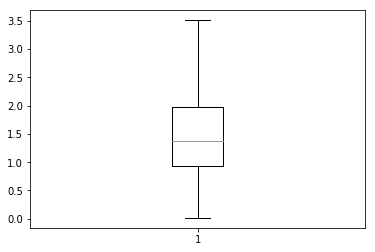

In [4]:
# Defining the function 'iqr_outliers' to help with outliers

def iqr_outliers(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

Q1 = data['IncRat'].quantile(0.25)
Q3 = data['IncRat'].quantile(0.75)
IQR = iqr(data['IncRat'])
data['IncRat']=data['IncRat'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.IncRat)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb92e95d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb92e8b9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb92e95c18>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb92e8bef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb938766a0>],
 'means': []}

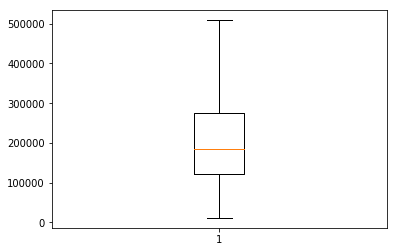

In [5]:
Q1 = data['UPB'].quantile(0.25)
Q3 = data['UPB'].quantile(0.75)
IQR = iqr(data['UPB'])
data['UPB']=data['UPB'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.UPB)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb92ec2f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb92ecc7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb92ec2a20>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb92ecccf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb92ed44a8>],
 'means': []}

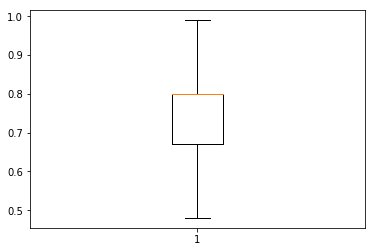

In [6]:
Q1 = data['LTV'].quantile(0.25)
Q3 = data['LTV'].quantile(0.75)
IQR = iqr(data['LTV'])
data['LTV']=data['LTV'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.LTV)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb92f0fbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb92eff470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb92f0f6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb92effcc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb92effda0>],
 'means': []}

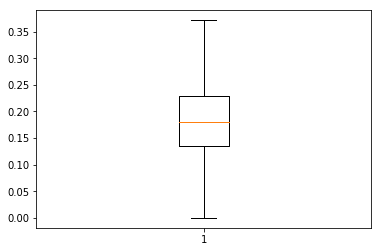

In [7]:
Q1 = data['Front'].quantile(0.25)
Q3 = data['Front'].quantile(0.75)
IQR = iqr(data['Front'])
data['Front']=data['Front'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.Front)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb93794cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb9379e550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb93794780>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb9379eda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb9379ee80>],
 'means': []}

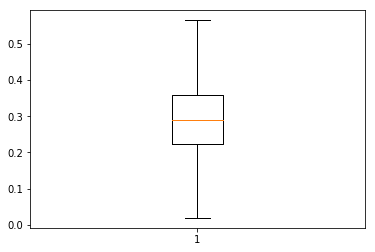

In [8]:
Q1 = data['Back'].quantile(0.25)
Q3 = data['Back'].quantile(0.75)
IQR = iqr(data['Back'])
data['Back']=data['Back'].apply(lambda x: iqr_outliers(x))

# Plotting boxplot
plt.boxplot(data.Back)

#### Normalization ####

In [9]:
# Checking the mean
data.mean()

IncRat               1.469643
UPB             203662.867927
LTV                  0.759503
Purpose              1.559183
Coop                 2.000000
Product              1.000000
FedGuar              0.146666
Occup                1.019577
Front                0.185294
Back                 0.289898
BoCreditScor         4.484825
PropType             1.986489
dtype: float64

In [10]:
# Moving features to another variable
features_no = data.filter(['IncRat','LTV','Purpose','Coop','Product','FedGuar','Occup','Front','Back','BoCreditScor','PropType'], axis=1)

# Dropping other variables
data = data.drop(['IncRat','LTV','Purpose','Coop','Product','FedGuar','Occup','Front','Back','BoCreditScor','PropType'], axis=1)

# Creating a new variable for columns
new_cols = ['UPB']

# Normalizing using MinMax
minmax = preprocessing.MinMaxScaler()
normal_data = (minmax.fit_transform(data))
normal_data = pd.DataFrame(normal_data, columns=new_cols)

In [11]:
normal_data.mean()

UPB    0.386646
dtype: float64

In [12]:
data = pd.concat([features_no, normal_data], axis=1, join='inner')
print(data.head())

   IncRat   LTV  Purpose  Coop  Product  FedGuar  Occup   Front    Back  \
0  1.5112  0.84        2     2        1        2      1  0.2174  0.3683   
1  0.7347  0.76        2     2        1        2      1  0.1850  0.2385   
2  0.8536  0.80        1     2        1        2      1  0.2084  0.3817   
3  1.4262  0.80        1     2        1        2      1  0.1481  0.3170   
4  2.0272  0.89        1     2        1        2      1  0.2072  0.3184   

   BoCreditScor  PropType       UPB  
0             4         7  0.748225  
1             4         1  0.203867  
2             4         1  0.229064  
3             4         1  0.302986  
4             4         7  0.774628  


#### Skewness ####

In [13]:
# Checking Skewness
data.skew()

IncRat          0.608441
LTV            -0.243533
Purpose        -0.083125
Coop            0.000000
Product         0.000000
FedGuar         3.994651
Occup           6.935553
Front           0.380497
Back           -0.063340
BoCreditScor   -1.141015
PropType        2.436915
UPB             0.657634
dtype: float64

__These skew values all look good. 'Occup' and 'FedGuar' are categorical variables, so I do not have to change the skew for them.__

In [14]:
# Printing the data
data.head()

,IncRat,LTV,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType,UPB
0,1.5112,0.84,2,2,1,2,1,0.2174,0.3683,4,7,0.748225
1,0.7347,0.76,2,2,1,2,1,0.1850,0.2385,4,1,0.203867
2,0.8536,0.80,1,2,1,2,1,0.2084,0.3817,4,1,0.229064
3,1.4262,0.80,1,2,1,2,1,0.1481,0.3170,4,1,0.302986
4,2.0272,0.89,1,2,1,2,1,0.2072,0.3184,4,7,0.774628


In [15]:
# Concatinting the target back to the data set
data = pd.concat([data, target], axis=1, join='inner')
data = pd.concat([data, data_year], axis=1, join='inner')
data = pd.concat([data, data_bank], axis=1, join='inner')
data = pd.concat([data, data_mortdate], axis=1, join='inner')
data = pd.concat([data, data_assigned], axis=1, join='inner')
data.head()

,IncRat,LTV,Purpose,Coop,Product,FedGuar,Occup,Front,Back,BoCreditScor,PropType,UPB,Portfolio_Worthy,Year,Bank,MortDate,Assigned_ID
0,1.5112,0.84,2,2,1,2,1,0.2174,0.3683,4,7,0.748225,1,2016,Atlanta,2015,2004452
1,0.7347,0.76,2,2,1,2,1,0.1850,0.2385,4,1,0.203867,1,2016,Atlanta,2015,2004453
2,0.8536,0.80,1,2,1,2,1,0.2084,0.3817,4,1,0.229064,1,2016,Atlanta,2015,2004454
3,1.4262,0.80,1,2,1,2,1,0.1481,0.3170,4,1,0.302986,1,2016,Atlanta,2015,2004455
4,2.0272,0.89,1,2,1,2,1,0.2072,0.3184,4,7,0.774628,1,2016,Atlanta,2015,2004456


In [16]:
# Exporting data to csv file
data.to_csv("MinMax.csv", sep=',')

#### Correlation ####

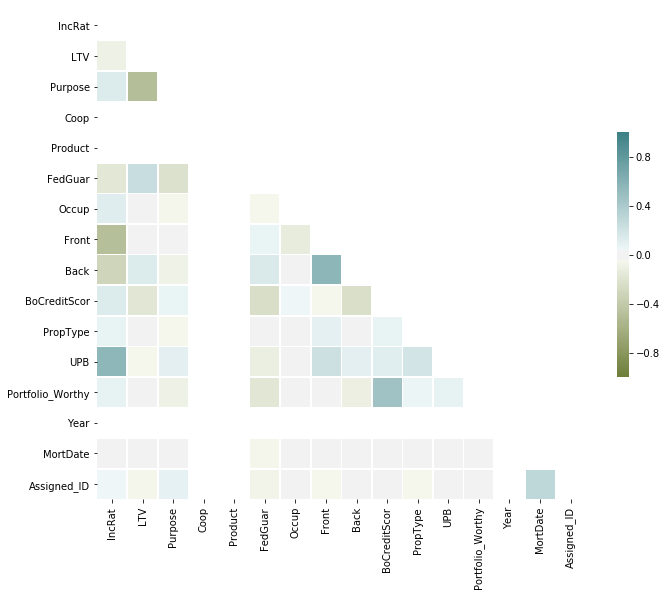

In [17]:
# Checking if the correlation changed
### WE ARE USING THIS CODE FROM COMPETITION 1

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [18]:
# Numerical correlation
print(data.corr(method='spearman'))

                    IncRat       LTV   Purpose  Coop  Product   FedGuar  \
IncRat            1.000000 -0.089183  0.133533   NaN      NaN -0.171191   
LTV              -0.089183  1.000000 -0.495246   NaN      NaN  0.246440   
Purpose           0.133533 -0.495246  1.000000   NaN      NaN -0.214228   
Coop                   NaN       NaN       NaN   NaN      NaN       NaN   
Product                NaN       NaN       NaN   NaN      NaN       NaN   
FedGuar          -0.171191  0.246440 -0.214228   NaN      NaN  1.000000   
Occup             0.119275 -0.015552 -0.054471   NaN      NaN -0.039286   
Front            -0.485387  0.013110 -0.007754   NaN      NaN  0.062791   
Back             -0.308504  0.137866 -0.078499   NaN      NaN  0.150438   
BoCreditScor      0.137778 -0.174076  0.065937   NaN      NaN -0.240443   
PropType          0.074903 -0.028917 -0.044382   NaN      NaN -0.014214   
UPB               0.559956 -0.044204  0.106953   NaN      NaN -0.114542   
Portfolio_Worthy  0.07927